In [ ]:
# always check the current version in github
!pip install networkx==2.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 8.6 MB/s 
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8


In [ ]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=6da48195ece86cc0ea09ed3272d482396f21cea69a1c7d302b77b63f1f78caec
  Stored in directory: /root/.cache/pip/wheels/07/93/05/72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia


In [ ]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt

In [ ]:
nx.__version__

'2.6.3'

In [ ]:
#https://en.wikipedia.org/wiki/Complex_network
SEED = "Rio Grande do Norte".title()
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier", 
         "Pubmed Central",
         "Digital Object Identifier", 
         "Arxiv",
         "Proc Natl Acad Sci Usa", 
         "Bibcode",
         "Library Of Congress Control Number", 
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Bibcode (Identifier)")

In [ ]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [ ]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [ ]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst, 
  # and add it to the set of processed pages. 
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)
  
  # Show progress
  print(layer, page) 
  
  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue
  
  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

0 Rio Grande Do Norte
1 2014 Fifa World Cup
1 Abc Futebol Clube
1 Acari, Rio Grande Do Norte
1 Acre (State)
1 Administrative Divisions Of Brazil
1 Afonso Bezerra
1 Agriculture In Brazil
1 Airstrike
1 Alagoas
1 Alecrim Futebol Clube
1 Alexandria, Rio Grande Do Norte
1 Allies Of World War Ii
1 Almino Afonso
1 Alonso De Ojeda
1 Alto Do Rodrigues
1 Amapá
1 Amazon Basin
1 Amazonas (Brazilian State)
1 American English
1 Amerigo Vespucci
1 América Futebol Clube (Rn)
1 André Vidal De Negreiros
1 Angicos
1 Animal Husbandry In Brazil
1 Antarctica
1 Antônio Martins
1 Apodi, Rio Grande Do Norte
1 Archipelago
1 Areia Branca, Rio Grande Do Norte
1 Arena Das Dunas
1 Arês, Rio Grande Do Norte
1 Assu, Rio Grande Do Norte
1 Atlantic Ocean
1 Atol Das Rocas Biological Reserve
1 Atoll


/usr/local/lib/python3.8/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.8/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Atoll
1 Augusto Severo International Airport
1 Automotive Industry In Brazil
1 Açu
1 Br-101
Could not load Br-101
1 Br-104
Could not load Br-104
1 Br-110
Could not load Br-110
1 Br-226
1 Br-304
Could not load Br-304
1 Br-405
Could not load Br-405
1 Br-406
Could not load Br-406
1 Br-427
Could not load Br-427
1 Bahia
1 Baraúna, Rio Grande Do Norte
1 Barcelona, Rio Grande Do Norte
1 Barrier Of Hell Launch Center
1 Baía Formosa
1 Beach
Could not load Beach
1 Bento Fernandes
1 Bibliography Of Brazil
1 Boa Saúde
1 Bodó
1 Bolsa Família
1 Bom Jesus, Rio Grande Do Norte
1 Bonfires
1 Brazil
1 Brazilian Antarctica
1 Brazilian Armed Forces
1 Brazilian Carnival
1 Brazilian Institute Of Geography And Statistics
1 Brazilian Portuguese
1 Brazilian Art
1 Brazilian Comics
1 Brazilian Cuisine
1 Brazilian Literature
1 Brazilian Mythology
1 Brazilian Painting
1 Brazilian Real
1 Brazilian Science Fiction
1 Brazilian Sculpture
1 Brazilians
1 Brazilwood
1 Brejinho, Rio Grande Do Norte
1 British

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

44863 nodes, 163612 edges


In [ ]:
# make a copy of raw graph
original = g.copy()

In [ ]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s") 
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in 
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Cashew', 'Cashews'), ('Coconut', 'Coconuts'), ('Dune', 'Dunes'), ('Mango', 'Mangos'), ('Rainforest', 'Rainforests'), ('Sand Dune', 'Sand Dunes'), ('Tupi Language', 'Tupi Languages'), ('Favela', 'Favelas'), ('Afro-Brazilian', 'Afro-Brazilians'), ('Asian Brazilian', 'Asian Brazilians'), ('Ordinal Direction', 'Ordinal Directions'), ('Plantation', 'Plantations'), ('Rubber Tree', 'Rubber Trees'), ('Temperature', 'Temperatures'), ('White Brazilian', 'White Brazilians'), ('Sovereign State', 'Sovereign States'), ('Bean', 'Beans'), ('Brazil Nut', 'Brazil Nuts'), ('Grape', 'Grapes'), ('Herbicide', 'Herbicides'), ('Oat', 'Oats'), ('Onion', 'Onions'), ('Papaya', 'Papayas'), ('Pineapple', 'Pineapples'), ('Soybean', 'Soybeans'), ('Tangerine', 'Tangerines'), ('Atlantic Forest', 'Atlantic Forests'), ('Quilombo', 'Quilombos'), ('Papal Bull', 'Papal Bulls'), ('Tropical Cyclone', 'Tropical Cyclones'), ('Black Brazilian', 'Black Brazilians'), ('Pardo Brazilian', 'Pardo Brazilians'), ('Bird', 'Birds'), 

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

44564 nodes, 163184 edges


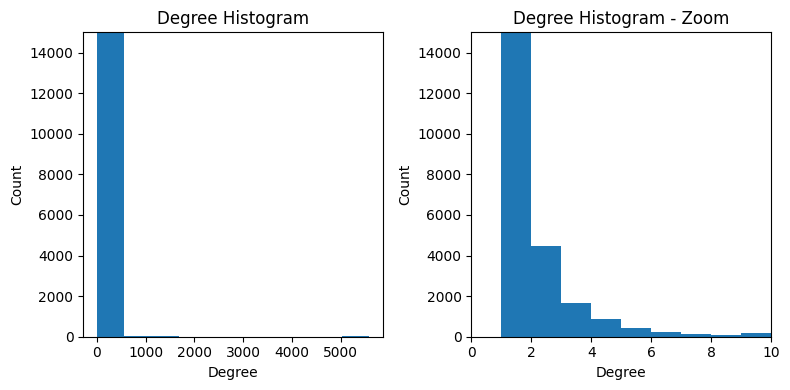

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cna.graphml")

14327 nodes, 132947 edges


In [ ]:
from google.colab import files
nx.write_graphml(gsub, "cna.graphml")
files.download("cna.graphml") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("Nodes removed: {:.2f}%".format(100*(1 - 3296/13526)))
print("Edges removed: {:.2f}%".format(100*(1 - 14494/24724)))
print("Edges per nodes: {:.2f}".format(13526/3296))

Nodes removed: 75.63%
Edges removed: 41.38%
Edges per nodes: 4.10


In [ ]:
top_indegree = sorted(dict(gsub.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

337 Brazil
294 Regions Of Brazil
261 Time In Brazil
250 Northeast Region, Brazil
247 Rio Grande Do Norte
240 States Of Brazil
232 Geographic Coordinate System
211 Time Zone
180 Municipalities Of Brazil
147 President Of Brazil
145 Politics Of Brazil
145 Elections In Brazil
144 Colonial Brazil
143 Brazilian Real
142 National Congress Of Brazil
142 Pantanal
141 Brazilian Carnival
141 Empire Of Brazil
141 Foreign Relations Of Brazil
141 Administrative Divisions Of Brazil
141 Human Rights In Brazil
141 Constitution Of Brazil
141 Law Of Brazil
141 Agriculture In Brazil
141 Indigenous Peoples In Brazil
140 First Brazilian Republic
140 Languages Of Brazil
140 Judiciary Of Brazil
140 Economy Of Brazil
139 Mining In Brazil
139 Economic History Of Brazil
139 Geography Of Brazil
139 Vargas Era
139 History Of Brazil
139 National Symbols Of Brazil
139 Climate Of Brazil
139 Amazon Basin
139 Crime In Brazil
139 Industry In Brazil
139 Transport In Brazil
139 Protected Areas Of Brazil
139 Tourism In Bra